# Assignment 1

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

### Load your image

1. Display it in RGB

2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )

3. Use the cvtColor function to do the same and compare results

3. Print the array shapes of both the RGB and grayscale images

4. Print a few pixel values of both

( Do you notice the difference that number of channels created on the array shape ?? )

(np.float64(-0.5), np.float64(366.5), np.float64(266.5), np.float64(-0.5))

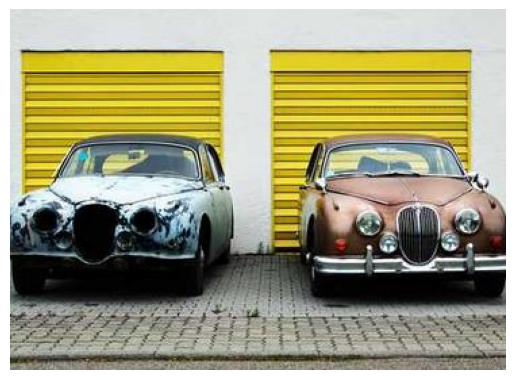

In [14]:
# importing libraries
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = """
/9j/4QDeRXhpZgAASUkqAAgAAAAGABIBAwABAAAAAQAAABoBBQABAAAAVgAAABsBBQABAAAAXgAAACgBAwABAAAAAgAAABMCAwABAAAAAQAAAGmHBAABAAAAZgAAAAAAAABIAAAAAQAAAEgAAAABAAAABwAAkAcABAAAADAyMTABkQcABAAAAAECAwCGkgcAFgAAAMAAAAAAoAcABAAAADAxMDABoAMAAQAAAP//AAACoAQAAQAAAG8BAAADoAQAAQAAAAsBAAAAAAAAQVNDSUkAAABQaWNzdW0gSUQ6IDEzM//bAEMACAYGBwYFCAcHBwkJCAoMFA0MCwsMGRITDxQdGh8eHRocHCAkLicgIiwjHBwoNyksMDE0NDQfJzk9ODI8LjM0Mv/bAEMBCQkJDAsMGA0NGDIhHCEyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMv/CABEIAQsBbwMBIgACEQEDEQH/xAAbAAABBQEBAAAAAAAAAAAAAAAFAAECAwQGB//EABoBAQEBAQEBAQAAAAAAAAAAAAABAgMEBQb/2gAMAwEAAhADEAAAAeuZ0idkO7IdMh0nGToi6QkkJJxnZDpIdJDJISZxJISSIqSIqTCSQmdhM7CZ0Mk4kwsLIbIIIfUFXFuE3GQCyFMFUJcKsLcKIXMIrBealFxJITDmlJIa4Rca8EUOVhBxyCCHoINgYItgYIMPQQWPXTpmHDmQnz+qUF8vtbZmRqWdk0vmVaXyuaVlRpfKq1rI8anyaesKuz/e8zJIGrLX+e9O5YVm7mxNW5saXW+JG18KNywtG9sKNqxoIbRpT7PnZJerC5/oA/h64ltf5nXCtzrhW9RgW9jCt6MC3qsD7njCtyMWqVnbJVJfc8zJ0c/Vtj8D1ZG2Pm4ltcwrcjA+1RhW5qwrcjC+1jHHdGnMDCn1/Okl6cIKZ53w9dSHv83sQQ94IOPc3rA8bnwMEEPQQWBG9YGrfaL29cm0m+55nSVB405/geresSzdqxKNqxo2rExtWJGxY1WxsarXHNFCRQMZ+rwTsvVhg5kL4OieL/N7SeKiTwrq9DqusLIO2oZQZBlCrciCzaOdV2e7oLJL7nmTOgLCdfwvVJM2U1GUJV16aHyNprWNVrWR40qm3J4s0aigsp9XgmdvVhc/0IbwdMb6X+b3zV7h/owNqOV/Z8IZait6Aa+kyZB5HBOpTHWtMus3h46yH+YO+Tr0bpe7mySoFC1vgeqLWU4B9XPdL9jjRIzq3jnJnJbyGh0K05qR+hBEN+vQHvnX4e2osLK7MkvVzQY2A8HR1Cfze+d4mPt+QHYYfrjnOhhfz1lBm1XIt1K745mXTV0NunRi3D4kOPTrUm6xJlQaDr4PqQDoAHXNHUjr/qecrHntHPcaCeb1coXVZZdx7mI40fwKSSy6MOoXJ86S573qE+mWDGBXG2OUfKVoWHq5n1gea11Dt1mllXFyoiXZZ5LKKSc7B1NlPPRPRi13TvBwDVqXw/Vhp3T75FrZs9+cmy97WejIpCGdltau1LLI3RXTdXZnoJ5LCmjnju+WaImnrx18sGx436Me86MagMTU2N6DPPuenbuGGax0R7y0mvpgUJ1W+dj0c9KXr5spx0dNcj091c9L2iljyfG9O7aBb18nMcSf776PVEdabz83PpxVF+3n6MGzlyHbzbCPLl1O7OcF8+nXjxFGsbCOMZjoLhlv9HmozmBMEWqpB6SztFRWlOhELPcsUCktDm8Bn1zIY7MWdUFwu7nsz1XL9GuiVFFmOqLfJ9UQJTnvXyrIirfQ7cNnx8+xdgjdOBsriWsgNQyFm4pzWw7EH0vOSyF6sGdkc+Fpu1s1HTgakDazoZc7YX4talyE89Bu1Caw1MEyHYC1XTCRlpJqozR0tzmmC+OmaZKdlWbinLLWhzPQ1xMuunN8cTJ1XAtjz2cfn7kecps6vactl66oC5d5o4vX1TLwuIqKRO2tciurIJ0MnQmdDOkJnQrarhELiMU3aZpkjtiD4EKgVkL4SorzMbenfl0nR5QzHSZwaU9ZzqOgyiUG2D2FuvPiCcR24Jie9zM8U3auvDruKzil2dBya7FHHLsmOOfsJRx79hYvIEOn0WC79dMOtSMsdFwNrLQAmDpoVwNHeDjk26eZyi6xjlF1bnJrrHOSXWzOQXXyOPfsZHGGjVg1l9ebW10FkzpKSCplhXe6ZdcYjtrxlsIaqplJltq0ZiU4XAYtKElsExGDuSrlCrGjaVqMiOiqslPNcSnmRdVKommriDydb4aLUyw0yMd1qKZ2ohXbMz6a5GbVWwnvoLGjYU2xmVu6GabE6baxpKwyurB82llrunAzS0VlMbrTOpoqlopSClAmzyXn5EL4DokqHIq4MiTrlHIvaBZEnQaxCIOkTlA2JNwbHZcD4GalGMTewOjEIGRMsC4lYKMY3XYNt1XqOlsYyvraskLbDG+ppM7aIFb23W//xAAsEAACAgEEAAYCAgMBAQEAAAABAgADBBESExQFFSAhIiMQMTJBJDBCQzNw/9oACAEBAAEFAv8A8K1AnmWJqM/FM72LDnYonmWGZ5hiTzDEnmGHPMsOeY4k8yw55lhzzLDnmWHPMcOeYYk72LO5jRL6nb0d/Hnex53sad7Gnexp3sad7Gndx53sad3Hndx53ced3Hnexp3ced3Hnexp3seV5VVjazWa/jjWcSThScSTYs2LONZxrNizjWbFmwTYs41nGs2CbBNixK1Fvo2iaTSaTSbRNom0TYJtE2iaTT1IPnp6GyKVbtY87WPO3jzt407mNO5jTuY07mNO5jTuY07uNO7jTu407uNO5jTuY87mPKbqrLPQ2XUp7lE7lE7tE7tE7tE7tE7tE7tE7tE7tE7tE7tE7tE7lM7lM7dM7dMouSx/Rdt5vrn1z659c+ufXPrn1z659c+ufXPrn1zWua1zWuYpG/0XFeX659c+ufXPrn1z659c+ufXPrn1z659c+ufXPrmJofSzqlvOs5xOdZzrOcTmE5hOcTnE5hOac055zznnPOeUvvs9D27LOw07DTsNOdpztOdpztOdpztOdpzvOd5zvOd5zvOd52GmO29/Q9TWW9Z51nnWedZ513nXedd513nXedd513nXedd513nXeddp12lNZSz0PVvs4JwTgnXnXnXnBOCcE4JwCcAnAJwCcAnAJ1xMdNjei/Tm+M+M+M+M0WfGfGaLNEmiTRJos0WaJNFm1ZtWYmm/wBF663bBOMTYJsE2CbBNgmwTYJsE2CbBNgmwTZNk2TD9vS9pS3stOw07DTsNOdpzvOd5zvOd5zvOd5zvOZ5zWTmsnM85nlLl7PQ9jrZzXTltnLbOa2c1s5bZy2zltnLbOW6cts5bZy2zlunLdOW2ctsx2LH0PUHt4EnAk4EnAk4EjLSkNmPOaqc9c7CTsJOxXOemC2iA47Tjq046pQqrZ6LFqNm3Gm3Gm3Gm3GnHjkFceaUTSqaVzRJ8J9c+qaY848ebMabMaYwVT6L11v4zOMzjMb4Kzlp7ifKfKfObmgLT3/HtNCwoBcLmry4wIs9Fqubdls2WzZbLM0rkf8AfMs5Wm+yDlMNWRDzCbrIHsmthm0zkKzZbMQMPS9jJbzWzmtnLcZc5yXcKq2LoocErinQ43sHuMymVRywWCbkiLTkJj+1mZih6fDLzkVeixnWzfbN9suvspow03mqkZEXHrWBQJZkCqJerz5ae8NSmHFWFdjV6FCm5Ud9mMxZvRYtJt24k24kyTRVTjVbR7Pk5Dqa8BVNmlUssx6xbmawnd+RKiRP/enR7PB248z0WcPJrhzXEni1lPDjgpXjBNNapyY4lx33aRGcFuXcptQgoRkBeOhwJ/6sFW/HCBvRartfx3QV26pRbl2jFfRcEITgoQuDx2HE1h8OBPllcfw2J4d8fL21OA+poass3y+VVnAo8V9FiO1vFdOO6ZlOuRi4lj0nJaibbCUW7Uq848mcebDj5pOzMgTMV91zBRpGL63u1la+JbDg3Pk4isGEEsaznWvKaFXQqV09AVj6rHrrHZLSw3WV0oprY3LfQ9j1fm6zbdyx7n2I9zlMjKxcl79t9dyvA4/Gk0mkIm2ATSaQ+0UjnYmrLoq4aIWWtab+yyNqvKgHsVqzirdqrc9lggz0AGRWZuAHKk3tNrPG46499NbI7PC4Ets9zZKH19D2IlvZqlt1b10V7Rk8ZlaqlJxannVURqrFhv44twcc4gvrilSNwgIjvoRUXhQAFRFvNTI4sRlW+urioXM8VXHZvFTZPDCLTkqjVW57BGtsaJfbXB4na1OFWgxr8ujBqHjtm/H8TFjZORcjUV77qd9Yd9Q7BlLTGf7/AMax6Wtt6ry7GdVX4rnvo+O++jDFtdbWaFX1WxFsVqqnleOu58papjZVlgXxC0MTXale2tFYEE1tNw3XUC6ym7jvrzKqksbrZOQdbZgaqcrLus9A/ePnW0X5l733THZq1quuybE20NnhrUzr26eDcdm/UYj/AOZr+NZknS7UTdo3iN23E5CVwLIre2baKqjm+7X6W8oGco2vrqMdtQT74ZmTaa0XMsZLbzSjZq336iZR+OwPclz25FtBUlAs5qqMdckHG/Ph6g5l+djta9i2IKfnw70K/wCfk5KJK8+y6zOb6sU6WbphH/M1ms1luTw2+Yx87eviNm6a+2NbsZMwbc27mmHk1irIRZh1iy+y1sewWgGjIVG5Rtxb49RNeNk+X33X4jqX3WLle1124O3zUgrYwsjqQKsU2q9fF6KdN9tJUuCIPaVZO1Tlkqbfagg15o+dH73aTw9VgM3RLw6vUt13Srl2LXWmW25/6QxWq2btYwBj0tTMJNtOW2ytvaxf3/VTskCWJPEPYph2NikxbNrWPvJNQi8OofGjCh4laKepq99Jqb8U1KsITQVYpBxaTOjqXwLEPRvYDBuQAc11P6d5iZIpqGeu0+I6quS4qt3XtwDU1gAUGzH4LioreAWiCqyNXYq+INbbMXxKzDry/EbMytlLVr+/6sqYJV4nmVLa99zV7mwDg3xsawEeGZRF423/AJ/vcYlxUHiJ3hID8m94Dp+PectonNbNxMQ6Td7bSYi6KFmnvt99vxaMDPltxfEL8aeZFo2ZSx71UuzKtgvStu3WIM5Yaas0Hwe7XH8GYNZlGlu/l6Nm5e3sNZWMjxNpu8UM4/FGmUNMr8D2/wBw/QWVprAnvs99Jt9tnxYezCEaE5LVZA8bvA86snnVkt8XstrXPauzzrIlnil1qr4tkovnebPOc6WeI5F081zQPNc6C9hPMsyeYZc7mS0zl+78B9ELTX/YsrqiJFWATSae2nx2/Ep8LB8T/tGkBXT8Yib8i9GsnAZwGcRnHNhmybJsmybDNhmycZnEZwsYMSwyrBO4VTj9tkK+xT249AE9lr+PH7PUdrUODsM2maTSafjT0aTSaTSbTNhmGvHOFdWxzoMXQdevd1q9OqpHVSdOdVdvVQAYa7uoIMeszrIYcdNeBVnEqBU9visqtVl/ZMdk2H9aQL8Ns4xr1w0bBfXoWzoTy/WDw8Ty6eXTy4Ty8Ty8Ty4Ty9YPD1nl6CeXpPLxBhgTluAqPGrb7D8rpuNSAuwHyfXQDcp3OWtdjPcCpyV3Mo3aHU7hbyG6xuIf/OtdsLOhcOV4LbF3+72bUVztFp3NaVfe8FhtrLvyM9gi26qLSWsZ9d3tXa+3kADWOILdZz7Y9xEe8lRkQ321w5NhBT2WsrCvIGUVziMUMWIOi1aQoLI3wVazBq1hUaLWRNAzltFSv4gnmYALVuVNTzMTsRfh+rXGqp7J7C6wbkQb191tsrJQa6beN2TWIA6ldrvWJ+x/CGs6qNy/wLV6Ti1GmxePSINIw3HdtgALDczlNorEfcwAKL/NiSsCe2m63+kQqGAaaSv5C5fjtWAEPZrsH6B1tYfGkjiddbIgGlnwXaJWNruuoG7TaAxX2rG5GXY5XUKXAK+4957hjX7rtaKpSbQZ8IANxYmAVqPgx1SAoIzIZvUTcm42VwPUJyVM29JuXUsugtrhZS3Ihi2II7oRvSbhqbE0V0VWdDOVJyrysUIRlVCybuRYHURnUjkEDgPzLEsADsGnMIWUtqpnPsjWic025JnHkbuO3bw3wUWkcFyTr2Q0MT130GNZBjWadZ4MZ51WMGMwJxrDBRYJ1bJ1WB6rida2HFs16rzq2GHDbXpGdV9Om+oxCJ1GnWYTq6xMXSGj34ZwqIaV040hpWcIhoUgUJOugPXTThSCioz9l4Pchjtef1F/nNNU/v8ARJIm47q/dH+M/qWHT8aQ/wAh72/siLP+WPsP4ISwIAikkaxPlP8AgD3n/cYxWO0HWAkjUxSdQByf/8QAKBEAAgEDBAEDBAMAAAAAAAAAAAERAhAxAxIgITATIjJAQUJQUWGB/9oACAEDAQE/Af0cMhkPhDIZDvpWnm8XRJJJJJJKJRXm2n4asXWPDqfK2l4asXWPDqfK2neTcjejejciUPF1jjPDU+VtK1dW09fdU6f4FLOx9E2VXV1gkdbHuP8AT3HvFXUaepPTNTNtLNq3LtS4Q6r09MfV1grwOfse4ekz02U0NDocmxoqcu1Ne0eo3wizFwWCoj8kTaDF9o6WhG3h/Q0Ni4LBqFNnqQzd1I2UsrcIoq7GhCZ1Z4IHJtbFngsFYiqh0qWOjs3/AGvu3CSRHtm20i8EECXCbKqB6kknV5gTg3fQR9RN5J88EftI4f/EACwRAAIBAgUEAgEDBQAAAAAAAAABEQIDBBASIVETIDHwM0FhFCJAMEJQgaH/2gAIAQIBAT8B/kSic5ylE9mqk1I1I1IlGpGpGunk108ic5Y/VC0kXfyabv5NNzhmm5wzTc4ZpucM03fyabnDLNNfUU51UXJ2R07nB07nB07nB0rnB0rnB0rvB0rnB0rvBg01a3yx3hEslks3NyWbm/rLHyLOrye+SfZJ9kn2SfZJ9kn2csL8eWO8Ih+oh+o3NyH6jf1G/qPfBZ+RZ1+cvfoj3Yj3Yj3Y9+s8J8eWOiFJsbGmRWKn4R+lr4P0tfA8PWvodMeUWY6izq85q239HQq4P09XB0KuB0R9ZYT48sd4RJhrPUq38Ct00JQVVKnyK4n4KHqIG0/KLllU1U1053IllKTcIotUUHVo+ka/wdSg6lA1S9zF2Fp10mD+PLHeEf7/AOlm3oogdMsuWnVVJRZpp85SVKUW1qph51v9zMNDubiUpnSp5FWkoNSK4qFCUEplq301GV6x1YKcJbpcx3vsur9zMMvwKr6ZBGUTnqZM5T2pkD7K05ZhaeSIyg+4ENFO40LKDfJEiNQ/HZUrc7mH0/2jExM0/ecQhvKTUT2TlPZHAiDShLtZH8Cf8NPbPfPbBBGcdkf1IznKM4IIyggggjsns//EAD8QAAIBAQQGCAQDCAMAAwEAAAABAhESITEzAyIyQZKhECBRYXGBkaIEEzRCI3KCQ1JiscHR4fAwQKMkcJPx/9oACAEBAAY/Av8A6Lp85H1Gj9T6jR8R9Ro/Uz4mfA+ogfUQ9TPifUQM+JnxM+JnxM+BnwM/R+pn6P1LMdJBvsT6uZyM3kZvIzUZqM1GbEzoGdAzo+pnQ9TNiZiM1GYjMMzkzM5Msxnf4dV3I2UbKNlGCMDBGCMEYIwMDBGCMEYIwRsoi7K/48DAwMDD/lalpYpmdAzoGfAz4GfAz4GfAz4GfAz4mfEzomdEzomdEzomahWJ18urRuXAzalwM2pcDNqXAzalwM2pcDMZcDMZcDMZcDMZcDMZcDMZcDMZ8DMZ8DMZ8DMZ8DPv4GffwM1bXnGnVpKVPMzPcZnMzOZmczM5mZzMzmZnMzOZmczM5mZzMz3GZ7jM9xme4zHxF0q+fV1m+ZjLmYvmYy5mL5mMuZi+Zi+Zi+Zi+Zi+Zi+Zi+Zv5n3cz7uZv5n3cy7C/qusG33GVLkZU+RlS5GVLkZUuRlS5GVLkZUuRlS5GVLkZUuRlS5GVLkZUuRlS9UZUvVGU/VGzZ6rShXzMr3GV7jK9xle4yvcZfuMv3GX7jL9xl+4y/cZfuMv3GX7jL9xl+4y/cN0p1W1KnkZntMz2mZ7TM9pme0zPaZntMz2mZ7TM9pme0zPaZr4TNfCZr4TMfCZr4S+Veq3bcfAzpcjOlyM6XIzpcjOlyM6XIzpcjOlyM6XIzpeqM6XqjOlyM6XIzpcjOlyM6XqjOl6oatV7+rfXyqYT9GYT9GYS5mEvRmEvRmE/RmzP0Zsy9GbMvRmzP0ZsT4WbE+FmxPhZsT4WbEuFmXLhZly4WOia8erluXgjIlwmRLhMiXCfTy4D6eXCZEuAyJcJkS4T6eXCfTy4T6eXAfTy4T6eXCfTy4D6eXCfTy4T6eXCPVcb8H1WlCvmZfuMv3GX7jLXEZa4jLXEZa4jLXEbC4jYXEbC4jYjxGxHiNiPEbEeI2I8RsR9S9U6rUVHzNnR8zZhzNnR8zDR8zZhzNnR8zZ0fM2dHzNnR8zZ0fMw0fM2dHzNmHMw0fMwhzMIczCHMbaSfd1W3Nx8zOfEjOfEjNfEjOfEjOlxGtp5cRm6VmOm9T9rxH7XjP2nGfteIx03Ebem9TOn6lfmy4zOfGasq+deq3pJ0f5qGb/AOhm+8zf/Qzf/Q2/ezGfEzDScTNnScbNifGzYnxs2J8bNifGzY0nGy/5i/UzbfGzM97Mz/0Y1B1XjXqv8NyMh+iMh+iMh+iLUtE0j+kI1MuV/a0jYjxM2IerNnR8/wC5ho+f9zYhzMuPEzLl5TX9jHSLxhX+RqtTp+7/AGJNU1eYtHPRpN4Nbx1jZ6urCvmZXuRlLiMr3D0SgtW6RJfuu81db8qqbD85IwjxM+3mbK4f8l6h/wDn/k/Z8P8Ak/Z8zYi/CTK/Ln+lplU7UY7V16MpcRK0qOvVaio+ZhD0MIehhD0FBO5b1/v+3i0aooxI3YRKKLqa1E+4x5FFo6fpE5NWqYI2TZ6NmKl20vRLc5RUvNOjJaSCv0bo/AjKWK1X1XZlTyMxcJmLhJ6T5i1V+6VlfadWa2zt+bw5GzHzLlH0FXf2IumvA2uRe16F8Y+hc6FGSifxLBiSnZS3UHV16rekkl5m2uJm1HiZ+G9eeDTwW9msqd39DuqTe/Acp7ld0az8j8ONldu8q+qvzNesa/0JaN4aSFDSaB77+q/mJV8DZXAbC4GQhooqrdXdS4nBYuKhXv8A9ZOTwbuMORjEk1hu6FRuhJKtKmFRavIqleu4vGtxG0k4TdL+3/f5ErCoq9lOq7Ma+ZlriL9GuM+fJRs4Rv7DaRtFG2Jwkkt9EX6SXobuExXCalh+KL7Fe6pjzZ2+Zfa4SL3247uz/wDpGaq0pVI6VSpWSp1XZs+Z+z5n7PmL5jVYqt3YfDzqqWrUqnyYwq444lVD1j/dmso+kTVon6n7F99ku02jj4QFX413YUuL/iq+MUVXxSp+7S4pN6N/pf8Ac2Ycyvy4v9Y4S+Fmq74zTH+EsG5Ot9x82W027kVXS46N8qm3T9J+JJzhvpAupTu6naysvTq4jk3ShqLSS/TcOC+HdHjWSuE6UdPujeRjGw4fvd/gV0sVGVdz6jXzLJ9S+JD+Xp7U9ytIrpIwfY+0tRha0LxVTSfMu1uy41Wn4f8AJGSVZLGnZ3nzNHp/lw0r1oy3MjC1a7+3ocpNJLeTlortHB0u+4rreZrOz4jl8JPxiWPiY/Le5u4sxlbkt0LzVhdvtFZaPS9lVE2qPDWuKt3GNX3Xl0PUvkvI15u/tZFWL5YVRgqdC7uhrqO1Ft9yMqfCOKhKLe9ovPlyQqK4rLRQfkarkvMuo+RrqUfKq5FYSUl/C69G16Dpar4dNlJt9iNe5dhcVLNfItRPlzVYyxFH4fRxa32XgOH3bykoR7nS8+ZHTJSX20Gp0kR0egitEo744s1pyfizU0k4+DHo5LWbrbVzqaOdj5sp7/71GtWLxsow1Sey60srAovh7XYx/FfFScqrVgSem1ewrW7ErWqxu6Eu2L/p1G1KnkZvsFr2vKghNFO4lHSyTvup0YeZq0tdxas3+AlGFWWdFFTp90v7eRLZjZi6svjBx/doLSRqk7saCSuK7ilu/dUlo5bSIStUslPtkaOEp6zROejUUpQqxyrWt9eiGkje08DT/L0n4UI33b+rGtIq6LjTcSlLtdOj5kcVIUfntNuzZ7hQxVL2yGjWy5aw91p0JaP06Ifll1MZeVTHSe4jR6THfUaT2pUI17KFOhyIRWxFepo7UlG0sak4VxXMqsaOnoSv3P8A3maddsJrlUr5mmjuV/P/ACNmijCtlKsu80c53u1s0NHNRsLCnRczSu07sF2ldJfa1WX+or+RLRRVZzx/hPkRTwda9SFaUV95lzmqWW3IWjwo9Vso2qdo4aO6Pa95oabo6w7auaIW90W5Gjin90mPw6IfkfUeo5V7zJlxGXS/fIgu9i6bKHotJSOkV8JCnPSwp3Oo5xdOxPciDetGtKop/u4veP8AYX5T4imLj/VDU3rdiRraOsXcy7TTd91Y3lpKylsov6LRa/iqSimXluKuO/qX4Hd2lnd0WZFdGqzLek1pMo4qruFTch9EtJ91bNelywHWTVOxmZL1PmKbdntYqC6O/pVvRuLd6qhSdbLVptKpWNaUqrUcUMV3Rc6JySqU0mjt1lSLUt5FtO0+0l8QkrEepmcir0zXkZlP0meiuj+LUX4lqXxMH5l/TXSyUSnz1T8ov/kq7uKr4mBGxKE/CRcn5FLDFcaVT3RY+hqjbrUrYlUf4M6jjYlUtOsTN9o38zDuJaeqsxdBS+VKy8HQ2GUUZGwyrgzRp1nRD0UoKUMPAjoowUdHEWk34SEIjGmGPiRjtWdlyQ9NpZKTGn5GHomUadfysu0UvQml29W91LD1ofusutI1FR9rK7+rty9TMn6l8mO8oumlDDpXRY7WWcfzI1vh9HI1vgtEz6LRDp8Ho1LtFa0MdLX97cXfBaBeRVfC6Cv5S3GcNH8Tg4/bIu0bT7nVClPUS3t3lj4Wz8pdxdFcI3YXAWpPX8DCXCfd6G1L1NJ4/wDTw6H0XmHSvEk40etvRl6J/oPp9Bwn02g4Rweg0Kr2RFOCi3/EqmxoeAsyUKfwxoWY2KflMzkZ3I/EnapgUWnaR9RI78an1Ok9T6jScRmzf6i12rpp/wBXyPI8hv8A58F0pbin/RrKWG5FCnb0s8iItwh3dGH/AEHXHtHQua9DXdX4FHQwLv5FKFn5l/5TtZVj6O4s2XgWfu3XGrHkNbi/EcpOlbrxtyTpdcL1MabyrdzY+hYj8RmFC6UfQxh6F/LoxwxKf8F/Riy5lmMlLvaNZ1fkK+xTsxLnh2IsuVrxWJrTh5IpClFvMKkpySv7sBSjZsLdZFBJVKtR8mbEVHcWVG1vcmWrKFOSV25VLNiNF3jVL3crxRnFO4aWjjGO43O095uwI/ixSW6hYaWA3RPuFWnqSVmC/UKVIut2Jsx5jpZi/wCRSxGlMbxWYwfiV1WNNRTE1KKW+4+016ehekKzErZ8UfiKMSNKWe7Eai6N4XFKq1Q7Y+GBqteaNmT8y1J6290uNp2e5G99xWsbRvs/zLky06Wu3sLnd3I39yRWl/iUWysaGDKtVbKdm5FS6KX6izdZSHStRJxvO9LAdUxUovMs7qDs4irAdHRtYI1hNULO59hdaqKsUU7cEVsttYFbiktl7JahW0uZfFGLxuuLVl2ypSd9cGOUE6/zL4itSeJcjZla3uhfFxhvVMTH2Fde12uJZj6uJjyLbi78LsCkU13lFVJFdeVO4uTbf8JtcjtiuZsGN5Zbr3UP8Fbl5CS3vcYEmOorru9FmiV2NB4EdUi4qlMTEpFNlqnIxXoTjjvNVXiK363cYOvei/HfqlrFYM/yUbVRzvrQToUnd2ULUWrXeO5eBRPV3XlK0j49Fq6pc0UN1N3RjeUuKVKyaf8AQxSNxS6iLqDdozDFFa3LovxKJmJaNxiujFHc12jv5iVUK9V6MbihtXlqvj0bqbjsawfRc6dp/k1r12m5SNxfWhezaMTbQ18yhtm1TzMeZtI22jbMwotJTuH+KLXNu4v0pm+Bmi/FqbaKfMvL5o2zbRtqhtm2SpLyqbZrTZtyRT5ki6cvU3+pf/M2bvEw9xfh4iu9xg35lL15n3F9X4sw5l/RLuE94hi6PIbKd4zHovLiu+vQiXRLuPMo8L+iu/pi95Gu+pgOvQ67mJ9C6H3IXgTvGKvYPopS6h//xAApEAACAgECBAcBAQEBAAAAAAABEQAhMUFRYXHR8BCBkaHB4fGxIDBA/9oACAEBAAE/IfCvGv8A1oy5cf8A7NP/AGr/ALeXg/8Ab8MeC/73/ggEkwgcE4LdTBQ/gploQQvOLn7U/ZhliIqVb9yEQc/zjOzM7szakzreFAbELc1oSZr43C0hfV0nDerpOEHm6T8o9J+Uek7Mz9PwwfcTfipYVHfHpPzjPwD0n5x6ThvQ9IjtfyMx3uUs+2sP7OaJEipaQu3W0JuhPx4BY9GfkRGn0n4U/Cn5U/CnC+k4b0n5U/Cg+mn40/GhJ0IIAC9v8lhQqJEiRYSaTgJwE4KcF6QA0ekTaJEIh4KKCUplHwKITSOwTBc/en7xn6hn7Bn6Bn6BnYGdwZ3BnenpO1PSduek7czsjPyj0n5h6T8c9IFQG9C/w1DcIezSdyfE7k+J2J8TsD4nenxOzPidnfE7O+J2d8Ts74nZ3xOyvidlfE7y+J2n8TjdvhON2+E4TDk/r/GkMDwdCmv/ABTdpNcbnfha5nBxUcX6p+0hRuF6tp/hQUwBWh3cI/vS/vy/vT3zL+5L+7L+7PdP+d3d88+ePP4PPcJMhc2yfz4jweZtg3nd9U77qnd9U7Hqna9U7/q/z4wpL90L9kJ9kdg+CDeAcA100JB8X4GIj61nH+npOL9PScV6ek470dJxnp6Tth0nZDpO39Z2/rO39Z3frO79Z3frOz9Z3PrO59Z2vrOKBTf+U/4rVr/lXd++M74ztjO+M430TjfROJ9E4n0T8hPyE/IT89PxUUyPbIX+eFswi/ZC/b0Tu/Sdk9E7J6In39EX7uiJ93RE+7oi9h/PAT9mP2Y/Tj9XxaKXQuSy/wAk8aOOJwikVI98SvAqqmwPCLx/4nVgIIEeKaCCEegjwfiApNPLV/i5b3/7W3Xfvd/+EMZljT6cIL4co1BQv88xBKazg+/KcP25Tg+/Kdo6TvHSdw6TuXSdi6Tt3Sdm6T9d0n6zpP3HSfsuk/YdJ+66S/58MSMhsX/k7EMm2/8A4QawxWMYxDmNEM4zznQP+HnFkSqAa/5k082H1OY1nb8QLHIGEeCeXpD3fSdr6Th93Kdj6wagJJyCMZ5xiVKR18EbwCbur/VQjhvV1nePrO0XWcN6usDwGRw60B1uXUh0Oy4zZ8CiMaU0tUob4g0XYbxoYCOPUnb607XUl/PN/wCDMIpRyAKv/BwiAg+GBQs6DmZk9DdIeePeEKNGB/iAz93Snc6s7Ylq+1IgZ/Prn5xRbj5z+wumz3fEBA5wQVjzXBRkPczFTCCZTYbjCeAq/T/JGUcNBrBsYfiJw3oioWy3bSEsHlsbAHGAuR5n3UJVXkD+AwHwLzPiEoAMeB/MBHy4EbR5oBvtj8IfmazkF/QYVkhjU9BMFC4SgdyDcP0uEAtlNxf4usLbT9VP1XWAhAhOjdYDDe8J0JHOwOA3QZwTAqDeTMBzgUSKgIQBLUAIEEdAcE2gToQJiCICin7QnPojNDEoARQKbcGZdHVDBnvo+cRQP452D5OFzB54xv8A5DQB4vB9Cn5aFjYHCzDjAbLw7PtK52uNyfwnrMKbkcxJ5DCIE9kKV7cEYWRVsY0AkbR/DCwnIULUP+iYOuK7Az+n1uIEjFAgKGz4Y9IaBEyGl414EJGjMa+IzQ1jSCB7RDiZZCPXZVeQVCsK+ITOugTq+Qzk+8agvYyZbAdxcGJhJOpmsAOxgFwiCCjCS8IP09/RzJ8jzj9hKqiDiM98Jj/FsZpZmI6/pO8PiBih8eiAtAAdhFV5lDBOgLAwPYCJ0ecGoRmCU7pNoQgAaEVGkVlooOFw2y4YiYJGJu4CQcJsiDAQCeSWXoJVfke4QLXIEakfj5Q4CFaprPyfSIqGqDpDAA4CGCL+Er0lYQx8y3UfgGcSsRLNMGP8CD3uIGfkesKr85HzEA4a1T1c21cqFaOQOkWB9X4cUpQJRIWZNQErYHsR7wIkFJxH7DHH4FyrFjBu+qON6oIeWAQZAGfUxbHLtc/2BU6BEW9BEIQ4BMCsDsBfwQp82/EDSyfQiB81U1D/AGZh42EKDygRRzr4gJfLK7ylQXkQR1ERfhsQ+IIVJgnHEOnWbMCZPOvOZllNoOhGvY8Ms3A0jVcaaQ5wgoMcFHvDhfY0QeJC0gRp3AaecvaLn4og242IhUQ8XxCa3YxWFl+vbGpiRN8D0HEEkSyTyNEAz/BOHDx0hHHhYu53OhBCG1Cz2jYMYCSR5/UIQyRoxvCjObEFq6I8rl5x0gYcU4D4DF5sxB4I8eZhSDA7S/mrhG9ACyDOyagmYgGT1HJ8BkwZI0IRacjn9IBQU0CzCCIm0IOEAc8hNemkMQlPLeUeevQnHNYh4EQENgB8rigxJBEkQ+AWigyGFABuJhEVyl3tGGwcTUIyGI29YoCpQOuVAVICWgDzNTaIwm6pxJyHcc0gMD59hJn4XrMJ0ARGzAxYsMZGkXEBEswbo/WANeoh7y2X5fDpNAWpPuPkJxWNAD263hRKAnzfyFQSoTdQAyVzqI2YPhBlzBt0NeZimAAGm0YRPlFuCBAfV7QEJR9oY6PcQC8JX9CBgiIpoD8xgPGggRjhWWTgjaCLDtVAwORyO7hV83TCDOZvEfcU+qN4rUcUBN+xFRLpW4MLC2FDpYFqxwnDMc3vCGswg4C4aQ05ep9fiNKksaqJwMQlKrj9J/VDjEy+BKBWtc732hqRikZLogBGJYQPCKs2k9um6BRBORalQmeI7sx6hKJyEJFTlBuGybVOCmwPMzMdhykCQ9NMQssWSLFMc4FE6aFbYqGM7Z4wxoByZWEwRU0s/nH4P01EAYzn8jE/waz6yggFxeZ53Ey/AQab11CawSLiIgb/AOMEGawevR5wxFO5PAFGCtYYIIxMpPB8XtAFUTlA3hZiLjYAQwCKC98oxDQuCpcMQjCP54WZQUxxUpEDi+Ed14Lr0x94e3PSq4QfSMEEVTHkvSHGhovXPYcBziBF2LB3CE5A27QshZHsYRncH9gR5P8AR+Iwa4IMrUNIEAngX2cH1qKiPOPFozOoFZhQZsqMkD9J7Q2PXdMzEQMImQeSVMxFs+TMjewfGv8ABuc09FCe2pgORE1TkOESy4moDJV4ynqYEH3xAVzhUmAhecEB0QbmDujJ+PAASOs9onZS0FKUCMxsSH8WItHFhNbTE8E/kvyJfwnKJ6Ag7SDO/GA2cM0uAEE5qveEQeW5eilh1YPs+IUnUD1WPIxgPaZmMXP6I9yQ1ih1XZmVAhyNhAxEq1siEplKsGGLiAQsx4E6MFCjA9yTzhJTDfWJA40iGj41HIKiRtrD9EECtpqGFIIbYhHAoymmDrDAAgzrEoAAJ2jhGLoWFkiIHhh2lTcIVQ0IYo4FjwcGZgoBVnMc6bQT8fDElsgmtYJswID6ERM2TvcQiRMwHDyGIUxvDAg6R6KTmGAKLlZx6ReeEGNaQgCA1p5xWbjhA3SqEhYzguvIzfp4BA7RJtCVF65qB6PNAfE1xAvPBE5ZkWWjs6kXD0eoYPHwAJKEIYCQATfpmC3zUAy85R3zQ57m9Qmlh1wQctbwAA5YRiIXGMIlheoxKQRWsYScAgIspoFCBAJYsGPfmQSajNbxDhEh8zS3HIB7iLQS6knSAS8kBgtFvKMwgPCI16wiIGxcZwmU6QwxAoTbQRdEnZijlPLOhnvRAYCQad9G08oKiHUCmRRWTjkID4BIQbiJ6+Y+Jy9T6IDFI6sP7AgyAMAQCKICA7oSABDjF1B/I5bS4EGxR94CGZHGhWIvJm4T2nHHCSYENMGDFHyOEx+bDnDmTEMFQJrNYJs8bg6BmY9gqjkjx2hNsW9INoALhlVYgQ9DPOGwXAQyJTuwJ6QBFe10hbeUNnGDH36QatJZAQMLGahmIQNiICBADo+5c1g8Rk5AUPOFQTAN73vWAgmGbiINkIU8vSS+Uwvoek3Y+TpCKinkEMxxeJGw/wBs+LMZ8B4JicQpCPSCAs1JCAWbyYWbcdYmFlvFGfOa8dtghJQAiLNYNA83FjJT33iu1/YAB0dkDhgsKPeE+fTxCdnQfqIxIDihI8zEhL6YTfTFYEFmCUAoeBAIQm+uACSSTNh18Puz6iYB88ihtxuHivlsMP8A52Q4ypmam8Ze8xMZuBNoECtHAwmLhWcpgXbBwe03mXgv+QULYI6GQbeL6DAEn0gxhWh1hHnwUaGNtOFGj7R423gcKPtOFOHBiCbSBuYOIByIJhveqxF1NgO0woG6xE6NhME6GFCzQQymWRoa5hC8YYWIMS0wxCgcliEwTUI/APG8CMaKKL/AfTwgfSWNC9kJUL3hZkgnQyKk8pEgg8DeExMQOcI2q90LKQ9agEEhvJPeL1gGoyYcU7r4jAXeAsQFZQTqWowKMFUixO0PwhXkXGZTDsS6QGcAI/0zGUs8abTEg1MsTTCxlKpJC0MAgJZntAAZAAWsEZVUAsCoHQAesXWCvRwhOEC8s4hQOYLENfIVyQWwc0dGrih7wh5kkkFm9YgK3xMHH2hzuuUxpx4CKcvTxmFlFiAJMXgxCQKluLlL8hnk4JR4wp2m3yMNUiyQlzhJGk66NvWIG2mUoTIDC0I4OIory3hxGbJOG4XQyHaW84mXE9DLS/uwgN61ZjiVYXAOCNljUJkMJSdwFpAQKF684RIx2WQuDJBjGlnCAEFoxlksAWYQgE+MiEFpCEBbCwZg5gF2ecBAFhsWvaKRXQTBxOO7QjLTzZ9MTawEGhxh0jkYZjbYzZLQO1JjAaW/AiJRbi0CT7zSg47iJw/FMIk0WUKUWwSUcuEBq4J0ZsKXqnkODLrAlA6HzhpJakpNxiH0hinNBZ9o3JzOojK5zQoTAzAaLncCoFLOpUCrYEJfnMIxhACPPMyGDUQSfmEQBQcg+yXBp0vEdSRZRjk2mwnOv5xsGCoQIuD5LGBjwrauUakHOyj8QpliHzBIG+ccE15yoWllsT7Ql+YO8MT0oAOADJyOTfOEjA7E4AVFXcwgCxBbS4Yg76lVGThUx0yV7wBgBIFoQNOEROUphNYZCpYUGsirEGQT1gxwHcbGAYi+UZVryh/IUhaMEeiAHUAwsQNAb0EF6R4+iDpwWJRsHQxHDipOu0MW6I/iE8dqQIhh+DXpCLi83rcANmSw7hVhjEYpzGwMMEngDYyAAAGUQfuCaRQGFmoZs2PaCww8IU4YGQQmxYqqHKJnArAecQILHgC9IVm9Owi+oSGNisUJdbCyhDQ3xZNHtv8AeC0w3Sp/ssMPSWoMSvnBhQBKbEIhmgRZAEdQNBo9YUhahlPSXDw2AgTHJya6wyoMxUI0ZbECNkIomoVLUiSMBvURCAOLy3DvSJYsCEDAOQAUJMgRLAGMI1MJ6xISAGgSjEIgEoXpGQSB2CAOmKIxEWWwR/ICgr5TYA5IhzgsAUNEJZZu0+WY4wEYQLcTKDDEuezWkQLXdQEA0N7iYJIL4DLWEY8YHWYAQ3TevCAUJQGIMQlDEDAoreoIQPGauVQ6nCPCP1IGP0jAldrplQQAYNIOo2OO84A3HbAtooRjA7qK11LdEk3ALEBziIZhBYCMpdHMRBHdAgKgWNEoYgWoSlJCHIwHOjgolXxE4b4QiAfEiN4W1hIFR84RBkG7SIzVtuIN8Pd6xpsYPMIpBIIOkBaINQfHCGGiJgvED487MCA9RmAqEGouVjZZeBAQ6cDnMsPKBAAOUCTiVkQ0RhoDlAbKzhaIatPYuHYTNhuM11qsQgoGjqITiW2UjaNJkaiPQxqifWBiCvFpDTa+BhYG63RQEI+coAsHOFGVHgDCDD6poEFYupp1a5uNsjXOA2eHOFzFbAw0jd4sQFQPAiUGiiqtwHbiisxmnPKUgAQd6hPJNwM5+BvLJPIp5FxxsgIcUUKcqWzlIAFhjG72BaHDLgZite0mYXAgjcUaGt0ym6cpQwCJkLQpwAU2dypPWPyYyvNDgZ5EYAKZEFjor7RkAYEOBFmIR6S3k6hFMNPeZPgHMB6k/EKsGiv7CBfUFCIUDipg+SUQcTnuaNlYeJwxkMQXbeGBKs45Q2bkGYUiuyDGAzBuWISYDpQHC9IhAAGTrAW3DqCw28yAOICSXJ0PWEUzSEsQxAS1iPcTabzWariFMCgqf//aAAwDAQACAAMAAAAQAEAEIQoAIMEAgIAAgEIUAAIMMECiOpZRQIwUImNnrBVZVMgyMnVp687JAE//ANUKMdHssCAGfNPtjOlGQMrmiAb7c5U8QFMGqCojhhMxANlPshioENjwJvh6pENP4XAElNTNpy/ukpQO6HneLXpF0QHMBTpbaP1u4CIuhssM7wH+QNDCPcozDJWhLCGtyNOu1DogukttF02e09xKWQ9l5xqR9F45oP8AvkzQvULI4Wk8gLdEDMpJMjOWdKUbkIyVieQHHqNDkzq0nN7Bg7cPfxylQwjACBDjoHiiuppXxzwiARkT320Xs7XjJjKwU3EElFGH1njmq/seXxThURblzHlm1WM7AjDggCggKgACTilrRQCyWVw5RB+qtPP9sMl8v9HzKiyM8T//xAAhEQADAAICAwEBAQEAAAAAAAAAAREhMRBRIEFhgXEwQP/aAAgBAwEBPxD/AKKXwjI+iP2Z5+B8j5EZGR9HwPgfAjW+NmVEFXGDBFw6rllEQQQQSRwew38bsnw/DPRH0Q/DPR+GznUZ6M9FYr0O9FfRX0Vw2cbMz2T6Z7J9Neyvs/T9NguNRfp+k+mezPZPpnsaxsThuylIWx9g+0+ou0po3c6DHNRBUKsdnJu+IBIotHoE0OwVCvpjmyfOocLJsIp7K9CdhraiTlGPye4+jYiSS0JgVUXCQyyDpqvfKppTDAakkpH9DrpH2Mux+kJu8xY3KY/RX7MMxwnBhMXGolZYpgJ9MqEj0PhRq8jCspuCRqjWIhKDSYq2JrA1PJkyRiwM1DvCGqjEknRlEQza8si8moHuHoU1DB09Bk5yJEWWDEbFRarIUTsU3kdiojYjIcsPJoTvGh5ga7SUg/sVWxqmfs/srsi7zEIN0oyNhN6G7ZapUVCXQyuK1/qiIgSRCeKKylKUvjeaXhS8lKLicaKUnhPAhOIQnhSl8KUvFKUvkxcIfGhu+VLzeEPyf//EACgRAAMAAAUCBgMBAQAAAAAAAAABERAhMUFhUfAgcZGh0eGBsfEwwf/aAAgBAgEBPxDCEITCE8EJhMIQhCYVLU5CCoqIKjkI6lXXHmOc5Uc5zo5Uc6OAcARoeCw1c9Dh9DOD0M/mM/iM/iM/mM4PQz+YxWJpVdTUaUzH3bJWX3HOOcco5RzDnC2GFZLHXhqfMfL6o8z1XweZ6/Qny9V8F5eq+Dsq+C8vX6Py7eQz/Kt7i7vPd7zcvLHnY87F9RfUX1FdQm+vuafm8EbnztR4QTo9idHsU/gnZPknZPkSfafIjXmraYo7830/6NdxE7grtCu0KEYj6formn6GbzdXh+bMnek70SNEr6n37i3qn7n0xifkrCwzvFu9ruR9Pb7Inqvb7NE9i+RO+q+TtpfI1fVfI3O4/C+TLtL5JqdXg7U+r3K7YyiZNc2SYkn6mvRO3+whLDJmJGiVxk2rjqXV9RDlX5i/JaISMgUK6TiEzVCAJxaamb8nh18zZm3Ewk7mSc9CSPIzDMJpKLApqOoSxcszd7zcVBtpzRbzyrErJiULIq6kIjoPSJo9CzdzuDpWJGvhomEaLgtcDceQnlhmE34/6V2XrM/YtXWYKHkINyQSBE8i0zV0bomOalNRLMjTRiwel1eye45V/pDPbW5m0JGoRki0FNZGtRSVGY3UdQ3qw1DpwVbkrJDhoRSrFd5MvLl31FNgghbwsnhNEMaosnBMhNB8cLBPBUOvBl1FLUdkBCKQehLkJRf5H4EXBcLjR+CrGlGPIgsyCwv+FKUyKXFSlE4UJlKUpSupWUpPAIyPBPAhCEwhCEwmBJvcrWuCUyb4unSCCYMuCRhKeN//xAAoEAEAAgIBAwMFAQEBAQAAAAABABEhMUFRYXGBkdEQobHB8PHhIDD/2gAIAQEAAT8QtNF9czm4NtMDo+0oZh5l3M8Nek8typTNEFOCOSFBvMxzPFSp9icf+XP0z1/8XM1iWbqUOYo5+0OoldCUSiMUJuOpX0qBWqlsLbuoHWek9CXUG5T9cdI7+jl5nMpZ0RyQeIDK+iSmXLzVf+PH0uWxrZL8QesXP0W4lk1DJf0T6WpafSFvErz9MzW4bgEo/wDF9vpT1EWoRc/rh1hq1mI6mX+RtZfRDOVjbazUM/QbIl/RqtTHB9Hf0Q5/M8alXKDklM19HKAFtF49I+PXAFu+INfqafmEQFsR2D+I9qp0B+J8/aplLK/7xAfrt+plBepb+oZbPxa/asSgHOlvxLms/ofif7/wgp/T7RZyPN/EOH+WfqFZC7lXrE/MHabLHpDoRea+meJVFTRAgBFG9pFq2/pwJjwmJKMEf0kV5pDr/wAQQs958Rqw3UFv8RTWTpY/UryHz/xLrCv5xKtp4YY7PTT9TqBN0l/nUNGfSgqawbQPYRgLexRYx4FzDh7xpyj6wv8AlmbtVHMGBVd16zYL6YN8GfoVhSH2kCV9lF21PIgfx5/gJ/jIBr2Ut+NLN+0gd1m7ID4kf+Yn+Yh9Kncw80VITiUcmZx9KER0yhBk0TtTtw6ZFeJsDGn9E/zI7VXuTFUGiAivQJ2PpNUA4mXMr3hMcUPPEoNllynW52ItJdBmWhUbw78Sj5/xO1/x0h/afiZP5Pafzn6n95+oV/s+E/1PhD/qfD6SJxv86X+F8Z0fZ+P1lIrGe6LYDWObCBj5+iZuHuYl1PuLea4/+DNmTbg3b0/+vXLl6hAmMijDeID6HDhy6Cx6N0EPtGupMuszlHkLUAcsy6b+yD/h+JfQ9vxNvj+J4Pb8RH0+n4ldN9M8Ht+J2Xt+J/A/E/mZc4jt7oHz9VOp7z6TYKqlRtN0o+Xj65lHDpxE+GlQh06PoSKQF+tEDGeXwgX/ANEOP7IafLF/9sX9Oi6w31+2Fe4VtmFkcJvaFVEvRLaqo4NzfKg0At1Z0Pbgf8aHYfSH+VAt3ekO2ekO8fzvP5PlC79nyl3zfKf2v7n9x+5/EfuU49u/cw/s+8/oP3FWXX/XMYFWDaMbxDUsmX0XQZIFcvU+iYdgOzQH0KMCzeR6uTvfZHe+yO/9sPUe2P4GOw9sdp7Yeh9kNWvshvpN+EM/fdufi84uVUsDLBt4rzLEwwSQ7DnbdUhTr7fmf4j8wo29vzO49vzDqP47zuv47z+nyTmtIvjU/wDluugw/wDg/Tb9YxNOpqA8NYhr6s0k7phcvUjf/b7fSFV+SVIKs10IIDf/AIVq1GusX8dI3f3+0/r/ANT+2/Uu/u+0WP7PaLFn8vaGZREisa6BLFUb+gYnDZGXpsgI2+gAAgVlGKanHwcqEz5v+CUS4WCKr+37RjQddS46/pPJwJNW5zbOLR0Z/olE20Ucd4Nlzwfptgi7onJhc3IB4/7uXrbTX+g+YW9z+7h/ynzPZq1+ZmfxfmKL1r1+YXd69fmUBMF8PmFdGmtfmLnZ6fmbuWuHzD1e9fmV+a/6YLD+DvBVOsyNcSx0/SzvAuzPtAcJF1eWNMLf2o/0cH/ZR/oYv+fJwe/jqe5j/dx/t4/3/wD4XCHgSUQ+mGSJdBVd/wASuXhnDjuEOI1HUt6Rs2bHbY4Z/pfKD/L8pXv3PlD/AKXyn+j8p/sfKX/0/MeD+HmYf4fedD+3mf43yn8nyn8/yn9Xyn9fynX9n5TMPsfKVsJOVNVw5manEcTZlQPxYF5lnM4X+btDm/m7T+e/Uw/ye0slel8ceQB0V+0WFn2D8k/HaQPT4JjoHsR1DgY7PbhxfcKfEFvyt/1GKC9P1kGBxSNfcl6mHqDMpefzkK1cpCV9PeBAKwF4W5oSFEFYVSY6T1iEgnBhtRGl8m/mOR/AQ2UryH7nQ/n7zqjt/wB5Vur+eYDwe3ywdI7fNEY8mkFfButUMUXsvBbJWLNqstjjU9ow4KSgAK2xk3bAjP8AJ3gGvX+aKZ/s8w1ISx79INqewPSCJVUKldpuW9XiEYou7gUukbE3xKGaPIfsJV7fXX9ZXykhI5d0BXF2PRM7Z/rtjHLJfyAfmVPK4EPVoUPBVJHKB7CV9OA3YUDtUqw3RZoowpWetwOdsroG8n6cfQhi6rKg26wZTb/XEo/r+0UpL/74jHqgbrmwefszi8iIA5Ogybj1UvJnvV9GD6br9r/Iln6t+AIroIVc+yIlMDKvUIhBWQj3hDd+wfiAYPd+5i6EgKUWlz0/RBnFgk5oKlPOTeYY5Hop6NZ8ytqXV4Y5NzDVTWZeLhdaKjw4FClbThIbvZ+WdOGMsoAWrFYyi+ZHzG1wzhBTFCkBGPO+VQqfWKPXItWdaykr1dsP7VAUdQnU6m4dyUCgDS27tqdF7ReDDwqVHCw2DIdVYNkRzZ0gcSJkFJjRapivD7Hf90R4hWXtDIN9S4YBX0qU2VFHxXBdvuz4d80Ff4feOj0oWaA3y1GL60rabXtbYKoIp2rJsehO53THhaNrv7sxQnZS7UFgcHWK2Tc2z3juVrQDP3iMpDQj+8Q2l3yH3EzHohJRegs5A5Jgm5XXJEKA8S2xp6vWh8yomL1NQS6h7wfMMe0EYFcGOZUaqAOD1YNnbtDeEQI1bpCnNP8AHMOFv46ygIQLVtdu6HsHWWqRTdhgA7V+VsCMRLdY2Z9ZZ4sp2WAW+6+0X0o6IuSrx2GV1STjEKaAYsHpGaq0r+SiLdtkynSFxduo1dMErIoqhyPaJE2EYQn0kdBdjlsPsPaL+2ndeh7MVZPpcts8xG1p4LfYhselEIteqUJXUJlODIbfxM/O6WEuj9KAAazJpfwqK8jfKH5i9kYyPxF4pdPFMQxnOgvUEmyDPMw3AFzFtNyhaN2odkAM5dw8kdVOSkYcJDRdmOMjLxSyL7n5iJUfBFBm+kfIhaAuAAoSkOkycOOJXmODj1INAZEDDEKdW3UgBiIpCW4AU7Psg3HnKe6xm4E3XiJJStgrnbGAz8L/AJZmECbKDd9YTEFQGWyuCX91HQJmhXvHveVGp8R9hBZgbDfclUI9VB7L9IZ501I9sxgXk3a+4ZQ6eFUfWqZTY+topQCgA20yq06I1S0Ly4gEKWFjdZeqWicYljqeSUrc0l4smH0tVHfFE/jX4jvfIwt+KmtEV5APaDAawgqXCt0vsRYPLsMKsNHS2Ay71v5X/EU0tP2FfvLanGHVPRrBKwRXZ2Zl66jk8uFexgihZ9iAB9bhi32C4OzAQVDZEccPZJkB26LXtG6JKor+2HCOAG2vKg0yGcBsCikZbicURMoU04ckNQyehxzOhVHrqF7ap4TCSrMy3QTxtgAE2gU5csLFNyjT0jQjY4UmFBq8PZziM7K0KUOAqU8dvpV81GFlRxbUCCaTJC66X4iAtt43LrbSBgv7xqt16y8tfg/kmaGCCr2ZYo1MTY6Kp7w1gXMm0iqYo7TUjSqkaXdkLh5gU7xsWRw6FnV1LiJVyBpdrOPooeYN+qD0LbQtnUgazfALHFmhX2tq4Mxx7gkUCPOUxSBhS0UcAmW6l7EpHa5EJWGXLCwCGab5qAgb5HDLMTO0zfTmKbY9yC3a3k6/9IMLvJY9TrDg9IikIOe4I5aYPMVjeRbs1CMoK2yB2qFbTBZyQ2d7j9KojBAdVjjhKZbKqvdrrE1uOD4M5j1fQZegsvYLQkdUW/iztzBiFYiLotOF7KMGw2J92HqqJkr6oQZPZhhGUU1xV4zBqs5IGUL7VO0hgHvKLOqr7FopJmq59i2XruKZy+FtM+RAVboBzKRUCYBLLW09ZlWXFaHU9vchDYnkhJbyr67+0IxtuOmrAP4iUlmQV1guLz4l5lFVJfVSVkMGDsWXspFzLmzxWpmDFaV/1GUz2VhrF+ah5/ZYM/eUPvBcvS5M/G7meciGdHHTXfNXoRATbFTyDZ6kIQabWAgN2Mf3QfibDgpOmDC94WBvmr+RKZoHTWIOUOqHd6eWoW5Ta9mx8FHW4N1iBR6IJXK7pqO0LQYFkfY+064yHl0YJ6pUoQyFktoWRoF2py59eIS9ftXou7J45nBSfLixlfb3WxS9x7agmJInVK1pit3xW4S4tLgUomby+ssaOv5BgciS2UOcMNEImONOKYeF6xO00GFFWxOYphrELIxocnODr6sdqtFFSd7VYILvc51rNORj4sTHVRdmxuzoxtw21BRhtigrnMy41AVTas66DxBpANYAC1V1WYAtEto9xgt7Wl33l+bIL5E/bAeJY5Fe7KWLLrHJCLiyNjfOZfinshKd4qrYjuPgCVWgNuZTpYUyjtBQTIX3IotLMarWfaCtr7R9VJkAeWMnsUH5QsLZwCaqzJzBOTsot8uo2skRLoBVgcu1EqBrYUBWnBYuTWJcbMQIVTgZpaOo0oaO1abAOrEqyUV2gduq7fVhptqUxfQ6uSJWM6AJ6bgZF0avCtI8xROsedw19vvCQgKnQ5/E3EKBooZ6LWEueoUgqg7vpiGYirpKkrfe/wATRFrBKJQSlXjK12jmFiZqsXVe+CLD6NEpfEIQ8jpL1fJebxiPTX0FThPQPaXiDLlUsgIcIweHdmg2x9x1QhX2I4r1HRU9oSraKWpX3/MoMX7ZKyj7j1lyapdwOEmY5Dl9YondpKlXBKy1AUWHQF3NgweI55gc28kCzS1L9Eo/X9dIfRqLnYYLxv8AcEb3nGZd2GblNA8E5Y7iYhp0qVrrfeYSlwEmfDiOTwsaavQRHzceMN7oFx95kqVx5bL++OxRweNsfdxjldUX3/QIyqIHmkB+PthcG5nhNhASE21XSz7ELGTCogt26VxzLCwh2Uza0cx2MsnLUb038MHxgFQcREvFiiMQCuMFl0HEaY1qma8k59Hjo8meY70sIiHD/wACVjmuAKmVA6czp9QFCJ4C/WYc8RwpYDWHjLkmb3t5E3Shj8RAyqIWnU6xm1fRsllaK1FYCndBYe6oHzWstC+c19owTFHDLVnQKjEJsXdLeKYrRx8iFgvTFLS3t92B8rfX/iDAL4HiOX1b7xVXJx1rzE7X88Rz0YUGwrQGjB6ypQBOvQfiFh1McnkuDFyuvEELVfv1g8C0VA2WxTWLs6xl3ln33QVfBjuQcmFW0sCtC95m1WMC0jHObiNLcdf9kOpVynpuLRdYzzf9rCyB0fCq37pXwMWWJZeKL8wpXXKG34sddsMR3FRK7JlTHDcZHEY2jq3rz6wbqwx2ldzLphxooBdhoO8T4cYqWnmZ3FQji6u4iCcgXO+PEEwHw2Tpf1cS1tKHa8/aG2+upd/QVlQUqv8AhMcuoQoCY8J7kdvApRkBdRPCD01Lwt4vyPaCTKNbrbiu3SXbE6ikPYWXZB+cf4K/GoR5qqDAuj8E9rIGRy4Iytyrh2aa3MFuPMoPQF3MFly5KNXrmLrhXUPJGjNPP+MqPUtkZFdpVSJCvMp7NI+kc64LsbXsENCrxctH0xcJL1iXSdYhNphZJi8WOL4iKoGvgBUw01TvMuuADxXdzJUXH3wQg4bR64igJhoCewoX0mQILgd6VlW8wGO8e2MOefMMDQ0Ri1Z0X1rtcrEElgA7tu+0RGAGK/cU3gccx6wqjNjd9sQ2Fja/EgzNx+QsitNK5f3hkISKLxmFJYcVjwEw+8qoCC1aAjQ4kJDW0NPaEKGlVfqO0AUGVLk74lO4LpW+8tjuqn2S3te8h95n1hYlD3Wdab0erco3WkDC/cTIOLi2Db6Ooi18Fmw+JzpMEr5MsKaSNF69JUWYDLm1vMuYE2qfaWDB3FsrMQs/4ZkjDnFLh0o3qbbls0cUxWp6Gn5mmCkfweIEFANHyRoFsENiuKp3cVesFGgWcX1zmDHmFCSoPS1agPMVFrra61omdQhOwQ8SG9WRIgllHpUaoW6KrwRrgFWu1kbpRfZhtj0i8a3zjrFY8tpDRRiINVctAlCc5v3iWlI1EUe07A+kKPFeE/CFeHA0XA5fvGzs95Qy/eEBMusvQnGVeOkbrC1EFyo28ezCpfzU52pV+00Lk0I8Bg8yyZHkL5c8xUbqXZNCviVe8dYxr4CNRn28fuWRu6/9oht92v3LiA3zW4tZltGbs8rKut4Ve2CK0AtdOsFQqVaDN6x03C8Aw8aIHNQc2riCMUyD0lwqWBRuI2tBA4dBr1+8RbKsmpiruyoF3Tm+vuQuuGtRQgB0I1MBad3HDi4QbDQVAMph2TKlbNfggMXthfsl6iHuEwt+RsoaxcNjBDv6mmnmGy0UYDPIOLTV2ZqYkVQLayVwdr1lEQdBrtEq4i2xXiNBzQBQUlAxx7wzEoNB6xUof44oz90AIKXV3B+tsOxNXMkprmZmZnvLb5jRl+me87jFDKsJtNp1EhAG9oZLCrtqKkrF2si6ZdGwCIWrll7WoEBgC2uxz2mWtZ1Sb94CAFBDN203Xatw1bRn3JTuJQ025jVg0lj2SDtM2qzBqWecCqsTw5uxvcXe0yOrAdJ1h9Ueh+5ne55D3IdKtFOeBWFYMMH+MFRFP8agjSAHYeKh2DCoAKDUPRqdgfCPMbsLcxoDRrMPtG3fv+NxTZny/ntGrQEvK8H1+lwA0xl1zL7VehEeY2/8JA/8mpWxzSKU2uqYqZqldO6OC4gsDla8eI9JGzRBroRgLS7VSvzHWWbWrd5mmldkrj+3Aso8LI47fqX1nkjXfMrCml0eZey2q3bMxofWpUqVKlQItkIjftxF7ULaJiJmumISzzwAsflIRLTICjxB1SF0WblGTXWNm6OtTow3be0zUGfoqeJXyzrEQyjTzUs2vaY9/Ug+vDxB759HFzp9dRqg6gxcdXIuj2uFguBXQDY+YNQhdYGFXUTfeArIzXMt6ya6Vv8AMqqNpBbjvCU5E2qqPtr8y8LDmLGG75PMoF5UB8gwRKnRgl3nrzMCW7h6YlaI5Dollax2ieyduJbJaJViYNS/SX6QbBS/S5fxDto+DzFjq54lMVMMtdB6ygwrlFg8Z/U12wHh98H3hZ6cPEhnOY8QBeH/AE+OkVB90o93iOOVmzIdr/LG10ShU+hywWtTEyHuqZ6qZYnpdJXmyAxZf88xIgUCOh8+I+lWmKLnN/rtDDfFSmzjUQsHt6HS+V6EFGjuABrh+YUdNaC8g9jBY1Bbw3bQYy7Ig0QkmFlrTNRtfQSoFgq8F/qK0wg9r2G6qpvXZCcC4pxusxNUKJMkzTXci0FFhaztwyuAa2woMOZf4mgcdKKPiME0yDQLqCVy8ANGm2N5+81pQrMmzdY1CFdpDfJz3KmLLkFs7x5QO7CDk8dmVfeAACU9oMUdEA1f4hXRqhKYe0EVVcjT4gIs0slX7oBBj3Ut6sxY3YzKpjaaZdc1QAxS8+IktDnhIOUFVFHh6eZcttHJZC9XYAhSS6NFP6haEtKJLKq6tviFq6KWHYb9rhkigd2RfEH3clSpsXXq8RFngA9oG4sKsMw6FXGN0Yhu0dJ0Yx+BlhkasFL3/wAjkmywDQbpL21csDgBW3UWOA9yLTolICinkAazAV4YeTneeO0XeEEmXFewEcTSt6bB7QJtAFxSlewHPePzsomjir6d4JCNiLOMdyXzQrVBTd7942KoSO8u/RhcyIf2AA5fSEtiC2hILUeXhScr1MZ5XSh42qIwNAOUxi6vvKi+N1mu9m5UKXoJgMoLtKKwCbycEw1iV7tBPRdalWeLIs7BmVhShaj0qo3CvU51tIiLZCicUYYxHwguxe5nKnaZPzoYGO+fXUt/rBDSmGrmK3vyGoF9GBbABZCrxKwUG1okckkAAvwcY4lLGJlUXg6ntFIu23s4TNV1gGCUrS+kA4gJZpha4SsYyRXXuuyX3FsoQ9IYcwNtqzlFDwaBNZs/JHe/tN/ZJjuSpL8EDLVui+YWKnIoVjemIWcoTXpS71uXiGgEHk21UXFv8AVnYZir+YB79J1D1mFwZQpOgXxvEtgYrFXBbmXESHOVwJKTd9I02DGi+MYxELFBZV8HQOkN0DaKXd07bJhpAtbeArP5iICXMLquTKAjSRD0uteKZQ+FY3fQH2SPhhntVuwZgcA43jvdY8YfMegKchZ0MfuO43aKx7ktB3EK77vP2glS6b07Gq95UVqDdr71LQD1iqG1jUyq6pSpkzUeoWinX2hiI+uL5XjK96jeqoRhThpzLc4LlrvrHpCR1K3wrLXv4jDvLIWnXGTzibHCBGk2WlPpBvTQENPQVfe2KKLm9OqmrhysgI3dPMB1DFB6tvlmdqdxXbjHrDwo0NWjFZOHmAF9IRamwhp7xQSuUEqYtePMsl1AKq7CN4jePA6LXABogrJk2ATvN4luqUHXPfrqA6F42uKU4PO4el0CClcagByNaF6MagERqYlpA5hDaJFwcE3UmAMhpmATTSzAb0ub6QXW1C85vERrY0i7rfUJyXHiIQIHdy12jGQYaSeXDH5grAtnYLSArhiAs1kWPlfzHlTjOmepezVgExoqI6taXOMxC4CltZ+IQkkosQxatG+E4iGMA4OombrizJuADAgXRWvW38wORQGQOtPteYmesRNdAuoThMApDvsPmH7izGzot+x3Fp4mmZdbtweuoZKRwC3rnL0lMSWAHtW1z/zmOqLBsb63nUoOsZqr3v7TRHFhfa8vacrGPuJMQ9muiqXm2g7TDWlQFOFvJ4qFiKM0bsZl7DmBx0zRFIYFIM11KHtOA0SAYx1PWDpXQseg4O8FgZl3KvhiF4Whr4UVa1uYMQrMkOlN5j2Em6bo98Yg0MW0qBwqwwYcPDKjlsrLAFKQuDjaHSOUElXCXgqZOkBpKJt6zgiWcLFir5c5g2io3TQVfXzCLZS99c/zBfWqK5d7iEscmaObv7RvWhVoVf3miS61nGLogogWBYOy5UGrCCjpzLN/QWmR55mAwVRCd/3H1QtjQXLLW5i9WHIO/PrKKqjOiArItlR5FJSrpAGPYuBSgmBj/k5kJcEeHY3NFa9ALuMFRZBbw8tS5SCwMF5ckSYJAtJVdZbZYqQvv4lOpluNBLnA5KAu9VGgcbmq9oHhFbktdIhrlJhTd4vk1Fe3aNE6KaIlRGgBTijpxLvjwswPATZXRugu/SWrUyAKeixu0rhRdwJBFCsPsxIBEAo04zWM3LhBzdHUA6MoWTo1n1iAvCC93TUplpTKJf8A1Ar6F57iv+Q2CVRU9veFvUrW4EVfrE7YIqu3Gsks2mhViv7R9th0WjRQ9ZkHylxvm8xc6aW5E7ZlbTRCrwcuLzA4ioxxOlS2yIudOa+ZVOcoxfSstdyJI2y0WbporN4qLXIWX4Z7sUx05UsdrJkm5HIbKhZ4mVWnXdMBp4qP1q4iW2cqrdD+5i5mAwVzTVSg0DcTnkW69iOFEwWt8KjdSueWfnvcQ1ksgZveGtXAFtl1ZXXPSIYpW0dffMsxBd7SdL1Ewu1LaXXG8FMpJaVBmve5RaVjp/lE9C4rZauqv1uJAqxYs1ZgebiayhVUj3dQlg6OFSZ57EZa3QApd78TVrdioafaL3IFgGh+JRLi2hk+viK5TATl27x+RFBTrvBiwFXdH2qLQOnQCjiusCEsBhoO/NxbG6gC2s9mWlCaIvbNS8CFWSTRDBDBsAt1jodZiYVCqWvYgupuVU+bjFrXkAeac9DxKgaUrAv1lriAyC3WCZjEEBwLDTxKGQPiVcQbQviEBAVCh2ILLTZCzXMN2Z6O0QANDSne2buxdmXDpYbcRKlY6VxFzKQA6GZTsvrloaGWjfmWQlISuy9QS/XTgkV3Z04axySqDiiva0xTZIlmctwQZ7MPEKyvhe7mHcUoWdFwWJsRprFSi71VLwaLiu0UbgHSv4iooAQQYBrBoxKnQbFiY5gY8i2mhUZdds6oOa1LCwWhV5riVRXC64qIRS1HSHurXR62Q7QHy1R6eYa1VD1FsJQI2BULTmtSlIN5Y3mvwwXNrLXvLjFDZ01l8u1tk5uMwN/TMSkObiLzlm9txBAqHVxgvqGNOZfIWM5rc//Z
"""  # long base64 string

img_data = base64.b64decode(base64_image)
img= Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")

(np.float64(-0.5), np.float64(366.5), np.float64(266.5), np.float64(-0.5))

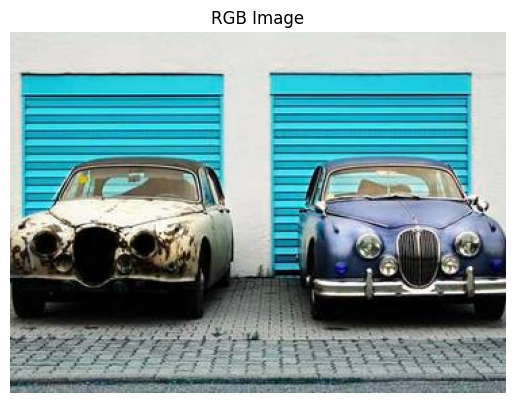

In [15]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Convert BGR→RGB for correct display
img_bgr=np.array(img)
img_rgb= cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)

#RGB display
plt.imshow(img_rgb)
plt.title("RGB Image")
plt.axis("off")

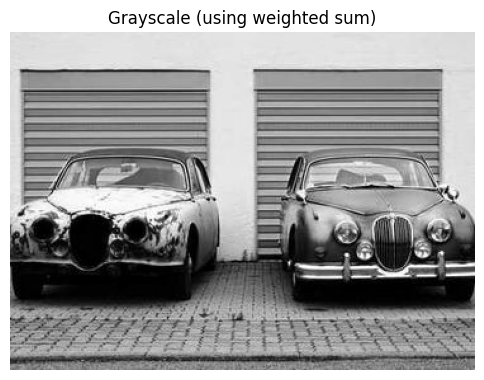

In [16]:
# convert to grayscale using weighted sum formula
img_gray= (0.299*img_rgb[:,:,0] +0.587 * img_rgb[:,:,1]+0.114 * img_rgb[:,:,2]).astype(np.float32)
plt.figure(figsize=(6,6))
plt.imshow(img_gray,cmap="gray")
plt.title("Grayscale (using weighted sum)")
plt.axis("off")
plt.show()

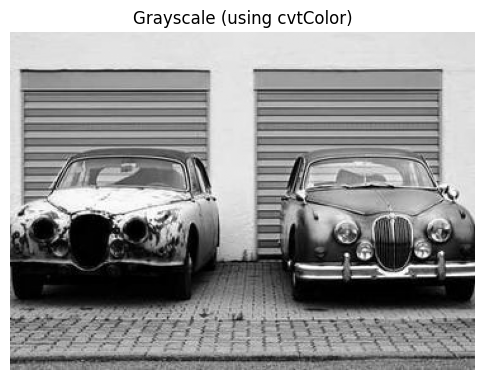

In [17]:
# convert to grayscale using cvtColor
gray_cv= cv2.cvtColor(img_rgb,cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(6,6))
plt.imshow(img_gray, cmap="gray")
plt.title("Grayscale (using cvtColor)")
plt.axis("off")
plt.show()
# The difference between the two results is negligible.

In [18]:
# Print array shapes of RGB and grayscale images
print("RGB image shape:",img_rgb.shape)
print("Grayscale shape:",gray_cv.shape)

# Print a few pixel values of both
x, y = 10, 20
print("RGB pixel:",img_rgb[x,y])
print("Grayscale pixel:",gray_cv[x,y])

# RGB images have shape (H, W, 3) with 3 channels while grayscale images have no channel dimension
# hence An RGB pixel has 3 values while grayscale pixel has 1 value.

RGB image shape: (267, 367, 3)
Grayscale shape: (267, 367)
RGB pixel: [222 223 219]
Grayscale pixel: 222


## Part B
### B1. Compute the FFT of the grayscale image ( use NumPy )
Steps:
1. <code>np.fft.fft2</code>
2. <code>np.fft.fftshift</code>
3. Store as <code>fshift</code>

### B2. Compute magnitude, phase and display Magnitude Spectrum

In [19]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.
# B1
import numpy as np
gray_float=gray_cv.astype(np.float32)
# Step 1
fft=np.fft.fft2(gray_float)

#Step 2 & 3
fshift=np.fft.fftshift(fft)

(np.float64(-0.5), np.float64(366.5), np.float64(266.5), np.float64(-0.5))

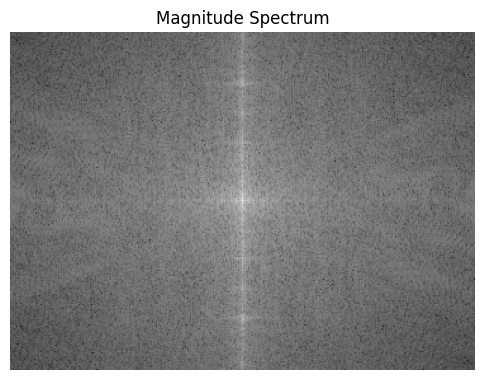

In [20]:
# B2 Magnitude & phase calculation
mag= np.abs(fshift)
phase= np.angle(fshift)

# display magnitude spectrum
mag_spectrum= 20* np.log(mag+1)
plt.figure(figsize=(6,6))
plt.imshow(mag_spectrum, cmap="gray")
plt.title("Magnitude Spectrum")
plt.axis("off")

## Part C
### C1. Create 3 LPF masks

Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

For each:

1. Create a mask

2. Apply to <code>fshift</code>

3. Reconstruct using <code>ifftshift + ifft2</code>

4. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

### C2. Create HPF mask

1. Apply

2. Reconstruct

### C3. Create a square LPF mask
Keep side of square as 50. The square will be at the center of the filter.
Apply, Recontruct and show the output.

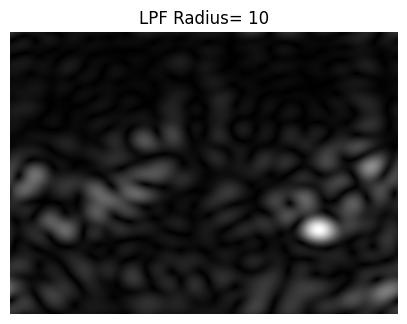

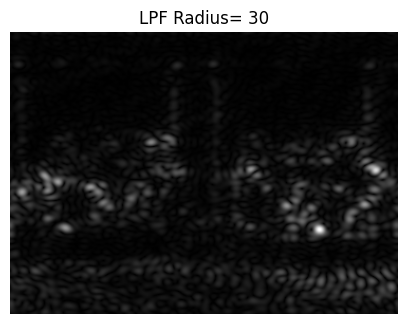

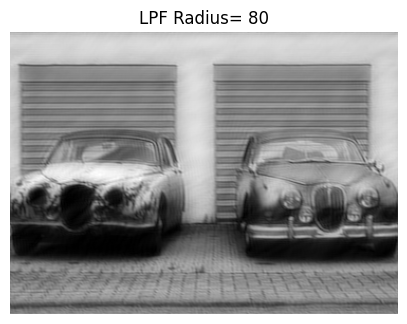

In [21]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

rows,cols= gray_cv.shape
crow,ccol= rows//2,cols//2   #centre of gray image
radii=[10,30,80]   #radii of filters

for r in radii:
  # creating a mask
  mask= np.zeros((rows,cols),np.uint8)
  cv2.circle(mask,(crow,ccol),r,1,-1)

  # Applying the mask
  f_lpf=fshift*mask

  # Reconstruct
  f_ishift= np.fft.ifftshift(f_lpf)
  img_lpf= np.fft.ifft2(f_ishift)
  img_lpf= np.abs(img_lpf)

  plt.figure(figsize=(5,5))
  plt.imshow(img_lpf, cmap="gray")
  plt.title(f"LPF Radius= {r}")
  plt.axis("off")

  # Smaller radius filter removes high-frequency components and keeps low-frequency components
  # Hence blur levels increases as radius decreases

(np.float64(-0.5), np.float64(366.5), np.float64(266.5), np.float64(-0.5))

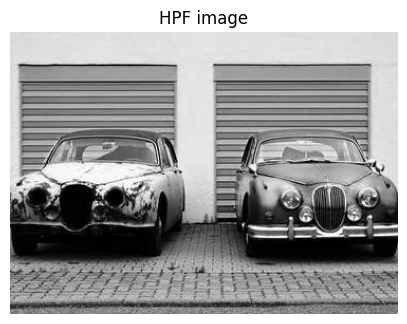

In [22]:
# Part C2 Creating HPF mask of * radius 50*

# creating HPF mask
mask_hf= np.ones((rows,cols),np.uint8)
cv2.circle(mask_hf,(crow,ccol),r,1,-1)

# Applying mask
f_hpf=fshift*mask_hf

# Reconstruct
f_ishift= np.fft.ifftshift(f_hpf)
img_hpf= np.fft.ifft2(f_ishift)
img_hpf= np.abs(img_hpf)

plt.figure(figsize=(5,5))
plt.imshow(img_hpf, cmap="gray")
plt.title("HPF image")
plt.axis("off")

(np.float64(-0.5), np.float64(366.5), np.float64(266.5), np.float64(-0.5))

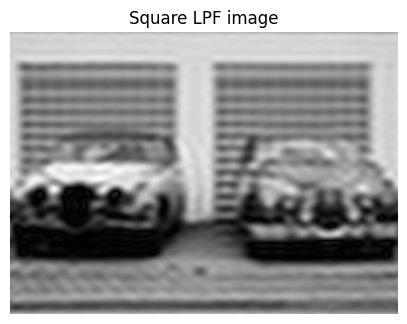

In [23]:
# Part C3
mask_sq= np.zeros((rows,cols),np.uint8)
side= 50
half= side//2
mask_sq[crow-half:crow+half, ccol-half:ccol+half]=1

# Apply mask
f_lpf_sq= fshift*mask_sq

# Reconstruct
f_ishift_sq = np.fft.ifftshift(f_lpf_sq)
img_sq = np.fft.ifft2(f_ishift_sq)
img_sq = np.abs(img_sq)

plt.figure(figsize=(5,5))
plt.imshow(img_sq,cmap="gray")
plt.title("Square LPF image")
plt.axis("off")


## Part D

###D1. Phase-only reconstruction

Use: <code>phase_only = fshift / np.abs(fshift)</code>

1. Reconstruct and display.
2. Also in code comments, mention the differnce between this code line and the one in the lecture : <code>np.angle(f_shift)</code>
3. Try recontruction from <code>np.angle(f_shift)</code> once and explain your output in code comments.



###D2. Magnitude-only reconstruction

Use: <code>mag_only = np.abs(fshift)</code>

1. Reconstruct and display.
2. Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.

(np.float64(-0.5), np.float64(366.5), np.float64(266.5), np.float64(-0.5))

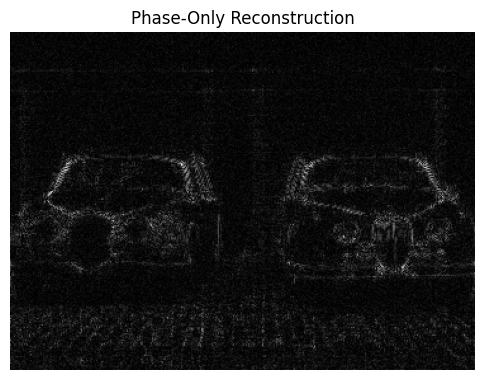

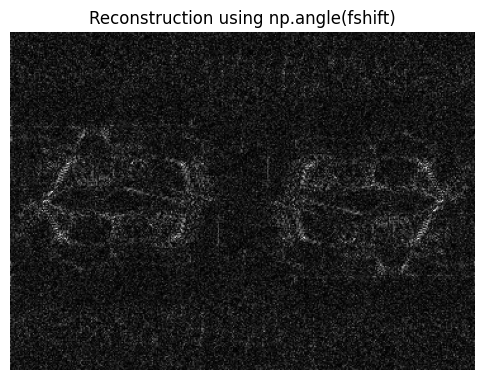

In [24]:
# Reconstruction using fshift/np.abs(fshift)
phase_only = fshift / np.abs(fshift)
f_ishift= np.fft.ifftshift(phase_only)
img_phase_only = np.fft.ifft2(f_ishift)
img_phase_only = np.abs(img_phase_only)

plt.figure(figsize=(6,6))
plt.imshow(img_phase_only,cmap="gray")
plt.title("Phase-Only Reconstruction")
plt.axis("off")

# phase_only= fshift/np.abs(fshift) keeps only phase and magnitude becomes 1 everywhere
# while np.angle(fshift) returns ONLY the phase angle values.

# Reconstruction using np.angle(f_shift)
phase= np.angle(fshift)
f_ishift2= np.fft.ifftshift(phase)
img_phase= np.fft.ifft2(f_ishift2)
img_phase= np.abs(img_phase)

plt.figure(figsize=(6,6))
plt.imshow(img_phase, cmap="gray")
plt.title("Reconstruction using np.angle(fshift)")
plt.axis("off")

(np.float64(-0.5), np.float64(366.5), np.float64(266.5), np.float64(-0.5))

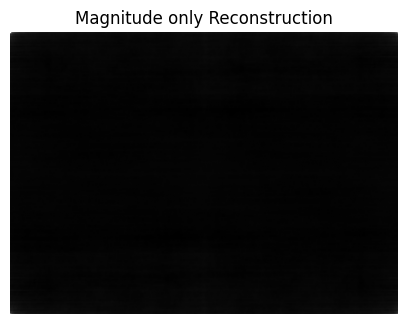

In [25]:
mag_only = np.abs(fshift)

# Reconstruct and display
f_ishift3 = np.fft.ifftshift(mag_only)
img_mag= np.fft.ifft2(f_ishift3)
img_mag= np.abs(img_mag)
plt.figure(figsize=(5,5))
plt.imshow(img_mag,cmap="gray")
plt.title("Magnitude only Reconstruction")
plt.axis("off")

# If we plot mag(F) directly, the large values dominate & the small values become nearly black
# while using log(mag(F)+1) compresses large values & reveals hidden structure in high frequencies
# Magnitude only reconstruction is different from Magnitude Spectrum because
# it has no phase, hence no structural information to reconstruct shapes.

## Bonus - Part E

Load another image as you did before. Then swap magnitude and phase between them. In other words, for both images, find the magnitudes and phases. Combine magnitude of image 1 with phase of image 2. Also combine magnitude of 2 with phase of 1. Then reconstruct and display the resultant images.

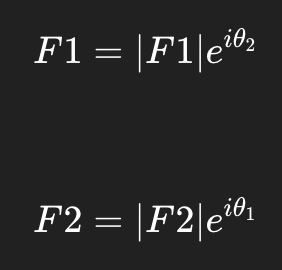

Do you notice how phase describes structure and magnitude describes texture of image ? Mention at last in code comments.


In [26]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.